# Models

Build models to see how much each feature contributes to productivity

- Models
    - LinearRegression
    - ExplainableBoostingRegressor
- Features
    - Education
    - Population
    - R&D Expenditure

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('../data/interim/dataset.csv')
df.head()

,year,GEO,Compensation of employees per hour worked (Euro),Compensation per employee (Euro),education,population,rd_expenditure
0,2010,Belgium,34.3,49054.8,48.457143,10839905,2.06
1,2011,Belgium,35.1,50593.5,47.857143,11000638,2.17
2,2012,Belgium,36.2,52178.2,48.242857,11075889,2.28
3,2013,Belgium,37.2,53452.5,49.242857,11137974,2.33
4,2014,Belgium,37.6,53965.2,50.285714,11180840,2.37


In [14]:
df.rename(columns={
    'Compensation of employees per hour worked (Euro)': 'per_hour_worked',
    'Compensation per employee (Euro)': 'per_employee'
}, inplace=True)
display(df.head())

features = ['education', 'population', 'rd_expenditure']

,year,GEO,per_hour_worked,per_employee,education,population,rd_expenditure
0,2010,Belgium,34.3,49054.8,48.457143,10839905,2.06
1,2011,Belgium,35.1,50593.5,47.857143,11000638,2.17
2,2012,Belgium,36.2,52178.2,48.242857,11075889,2.28
3,2013,Belgium,37.2,53452.5,49.242857,11137974,2.33
4,2014,Belgium,37.6,53965.2,50.285714,11180840,2.37


## Capturing Trends

There are several ways to capture trends.

- Move data to n years (`shift`)
- Take the mean of n years
- ...

In [15]:
shift_range = [1]
for feature in features:
    for shift in shift_range:
        df[f'{feature}_shift_{shift}'] = df.sort_values('year').groupby(['GEO'])[feature].shift(shift)
        df[f'{feature}_diff_{shift}'] = df[f'{feature}_shift_{shift}'] - df[feature]
        
df = df[df['year'] >= 2011]

df.head()

,year,GEO,per_hour_worked,per_employee,education,population,rd_expenditure,education_shift_1,education_diff_1,population_shift_1,population_diff_1,rd_expenditure_shift_1,rd_expenditure_diff_1
1,2011,Belgium,35.1,50593.5,47.857143,11000638,2.17,48.457143,0.600000,10839905.0,-160733.0,2.06,-0.11
2,2012,Belgium,36.2,52178.2,48.242857,11075889,2.28,47.857143,-0.385714,11000638.0,-75251.0,2.17,-0.11
3,2013,Belgium,37.2,53452.5,49.242857,11137974,2.33,48.242857,-1.000000,11075889.0,-62085.0,2.28,-0.05
4,2014,Belgium,37.6,53965.2,50.285714,11180840,2.37,49.242857,-1.042857,11137974.0,-42866.0,2.33,-0.04
5,2015,Belgium,37.8,54043.8,49.171429,11237274,2.43,50.285714,1.114286,11180840.0,-56434.0,2.37,-0.06


## Aggregation 

In [16]:
for feature in features:
    df[f'{feature}_mean'] = df.groupby(['GEO'])[feature].transform('mean')
df.head()

,year,GEO,per_hour_worked,per_employee,education,population,rd_expenditure,education_shift_1,education_diff_1,population_shift_1,population_diff_1,rd_expenditure_shift_1,rd_expenditure_diff_1,education_mean,population_mean,rd_expenditure_mean
1,2011,Belgium,35.1,50593.5,47.857143,11000638,2.17,48.457143,0.600000,10839905.0,-160733.0,2.06,-0.11,51.072321,11211756.0,2.44
2,2012,Belgium,36.2,52178.2,48.242857,11075889,2.28,47.857143,-0.385714,11000638.0,-75251.0,2.17,-0.11,51.072321,11211756.0,2.44
3,2013,Belgium,37.2,53452.5,49.242857,11137974,2.33,48.242857,-1.000000,11075889.0,-62085.0,2.28,-0.05,51.072321,11211756.0,2.44
4,2014,Belgium,37.6,53965.2,50.285714,11180840,2.37,49.242857,-1.042857,11137974.0,-42866.0,2.33,-0.04,51.072321,11211756.0,2.44
5,2015,Belgium,37.8,54043.8,49.171429,11237274,2.43,50.285714,1.114286,11180840.0,-56434.0,2.37,-0.06,51.072321,11211756.0,2.44


## Scale Features

In [17]:
columns_to_fit = [
    'education_mean',
    'education_shift_1',
    'education_diff_1',
    'population_mean',
    'population_shift_1',
    'population_diff_1',
    'rd_expenditure_mean',
    'rd_expenditure_shift_1',
    'rd_expenditure_diff_1',
]
for column in ['per_hour_worked', 'per_employee'] + columns_to_fit:
    scaler = StandardScaler()
    df[column] = scaler.fit_transform(df[[column]])

## Check Correlation

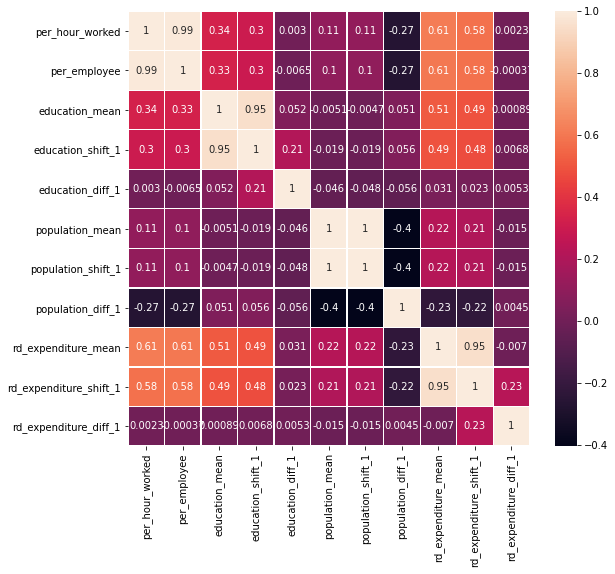

In [18]:
corr = df[
    ['per_hour_worked', 'per_employee'] + columns_to_fit
].corr()

plt.figure(figsize=(9,8))
sns.heatmap(corr, annot=True, linewidths=0.2)

In [19]:
df = df.dropna()

## LinearRegression

$$
y = \beta_0 + \sum_{i=1}^{n} \beta_i x_i
$$

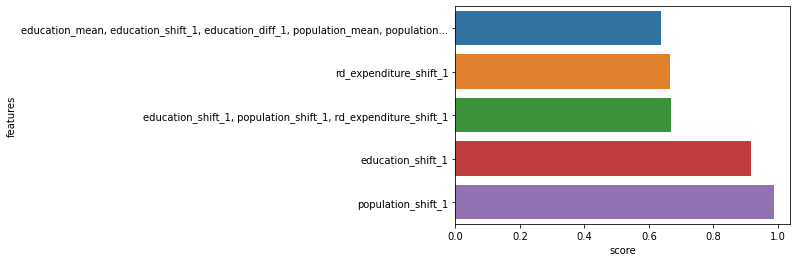

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

def train(features):
    x = df[features]
    y = df[['per_hour_worked']]
    score_on_train = []
    score_on_test = []
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    for train_index, test_index in kfold.split(x):
        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model = LinearRegression()
        model.fit(x_train, y_train)
        score_on_train.append(mean_squared_error(y_train, model.predict(x_train)))
        score_on_test.append(mean_squared_error(y_test, model.predict(x_test)))

    return np.mean(score_on_test)

features = [
    ['education_shift_1'],
    ['population_shift_1'],
    ['rd_expenditure_shift_1'],
    ['education_shift_1', 'population_shift_1', 'rd_expenditure_shift_1'],
    columns_to_fit
]

scores = []
feature_names = []
for fs in features:
    scores.append(train(fs))
    feature_name = ', '.join(fs)
    if len(feature_name) > 80:
        feature_name = feature_name[:80] + '...'
    feature_names.append(feature_name)
    
result = pd.DataFrame({
    'features': feature_names,
    'score': scores
}).sort_values(by='score')
sns.barplot(data=result, x='score', y='features')

## Visualize Feature Importance

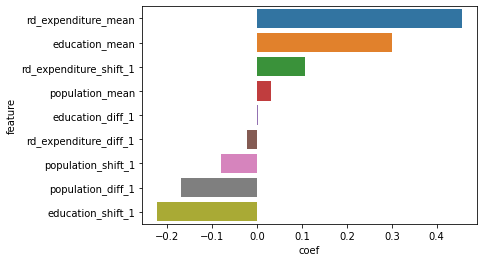

In [21]:
x = df[columns_to_fit]
y = df[['per_hour_worked']]

model = LinearRegression()
model.fit(x, y)

result = pd.DataFrame({
    'feature': columns_to_fit,
    'coef': model.coef_[0]
}).sort_values(by=['coef'], ascending=False)
sns.barplot(data=result, y='feature', x='coef')

## ExplainableBoostingRegressor (from InterpretML)

EBM is a generalized additive model formalized as follows.

$$
g(E[y]) = \beta_0 + \sum f_j(x_j) + \sum f_{ij}(x_i,x_j)
$$

EBM learns the best feature function $f_j$ for each feature to show how each feature contributes to the model's prediction for the problem. EBM can also automatically detect and include pairwise interaction terms.

Paper: https://arxiv.org/pdf/1909.09223.pdf

### Global Explanation

In [11]:
from sklearn.model_selection import train_test_split
import interpret
from interpret.glassbox import ExplainableBoostingRegressor

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

ebm = ExplainableBoostingRegressor(random_state=42)
ebm.fit(x_train, y_train)

ebm_global = ebm.explain_global(name='EBM')
interpret.show(ebm_global)

<!-- http://127.0.0.1:7880/5027041360/ -->

### Local Explanation

In [8]:
ebm_local = ebm.explain_local(x_test[:5], y_test[:5], name='EBM')
interpret.show(ebm_local)

<!-- http://127.0.0.1:7997/5045279632/ -->

In [9]:
from interpret.glassbox import LinearRegression
from interpret.perf import RegressionPerf

ebm_perf = RegressionPerf(ebm.predict).explain_perf(x_test, y_test, name='Linear Regression')
interpret.show(ebm_perf)

<!-- http://127.0.0.1:7997/5068892816/ -->